# <font color='black'>Análise Exploratória em Conjunto de Dados do Kaggle</font>

## Dataset Used Cars DataBase



In [18]:
# Importação das bibliotecas que serão utilizadas na análise.
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from datetime import datetime
sea.set(style = 'darkgrid')
%matplotlib inline

In [340]:
#Criação do DataFrame Pandas
ds_path = "datasets/autos.csv"
df = pd.read_csv(ds_path,encoding = "latin-1")

## Primeiro queremos saber qual a distribuição de Veículos com base no ano de registro.

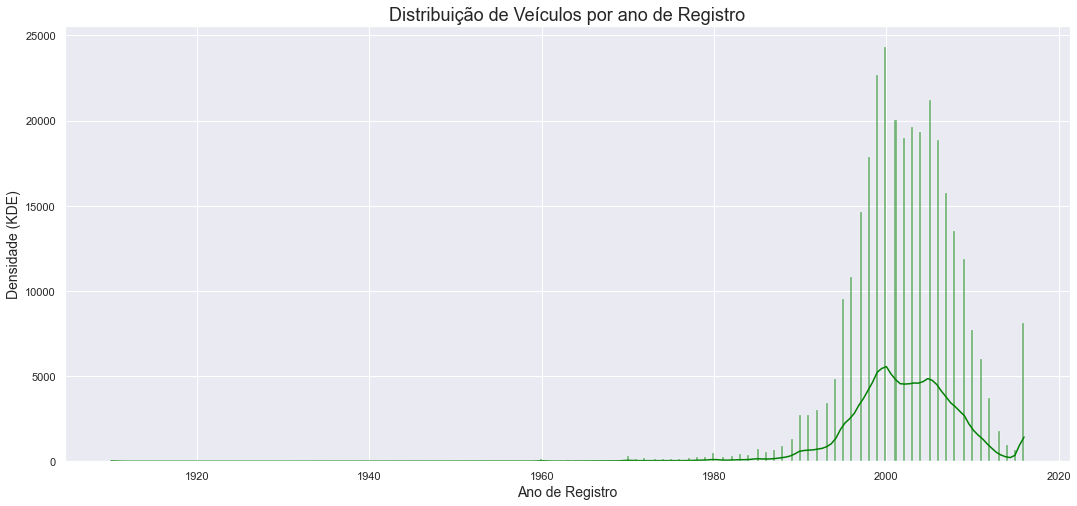

In [3]:
# Primeiro queremos saber qual a distribuição de Veículos com base no ano de registro.
fig, ax = plt.subplots(figsize=(18,8))
sea.histplot(df['yearOfRegistration'], kde=True, color='green', ax=ax)
ax.set_title('Distribuição de Veículos por ano de Registro', fontsize=18)
plt.xlabel('Ano de Registro', fontsize=14)
plt.ylabel('Densidade (KDE)', fontsize=14)
plt.show()


## Vamos procurar Outliers na variação de preço dos veículos observando o tipo de cada um deles.

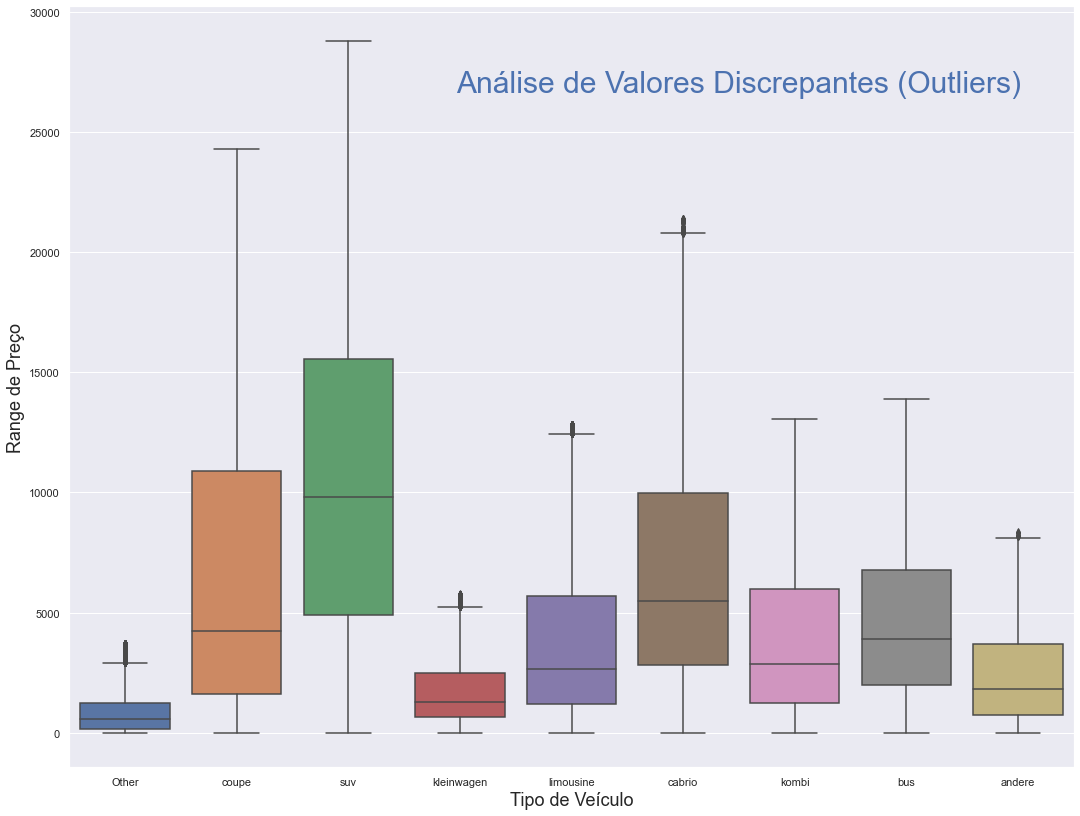

In [17]:
sea.set(style = 'darkgrid')
fig, ax = plt.subplots(figsize=(18,14))
sea.boxplot(x='vehicleType', y='price', data=df)
ax.text(5.5,27000,'Análise de Valores Discrepantes (Outliers)',fontsize=30,color='b',ha='center', va='center')
ax.xaxis.set_label_text('Tipo de Veículo',fontdict= {'size':18})
ax.yaxis.set_label_text('Range de Preço',fontdict= {'size':18})
plt.show()


## Podemos observar que existem algumas categorias com preços destoantes ultrapassando os whiskers

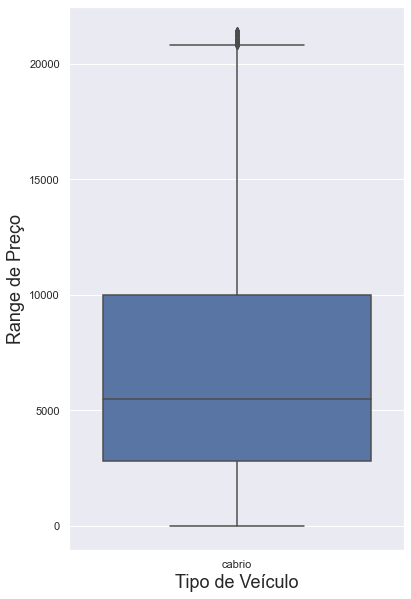

Valores estatísticos sobre preços dos veiculos do tipo cabrio
Valor mínimo:                0
Valor 1º Quartil (Inferior): 2799.0
Valor mediana:               5500.0
Valor médio:                 6935 2
Valor 3º Quartil (Superior): 9999.0
Valor máximo:                21400


In [16]:
#Vamos procurar Outliers na variação de preço dos veículos observando o tipo de cada um deles.
cabrio = df['vehicleType'] == 'cabrio'
sea.set(style = 'darkgrid')
fig, ax = plt.subplots(figsize=(6,10))
sea.boxplot(x='vehicleType', y='price', data=df[cabrio])
ax.xaxis.set_label_text('Tipo de Veículo',fontdict= {'size':18})
ax.yaxis.set_label_text('Range de Preço',fontdict= {'size':18})
plt.show()
print('Valores estatísticos sobre preços dos veiculos do tipo cabrio')
print('Valor mínimo:                ' + str(df[cabrio]['price'].min()))
print('Valor 1º Quartil (Inferior): ' + str(df[cabrio]['price'].quantile(q = 0.25)))
print('Valor mediana:               ' + str(df[cabrio]['price'].quantile(q = 0.5)))
print('Valor médio:                 ' + str(round(df[cabrio]['price'].mean())),2)
print('Valor 3º Quartil (Superior): ' + str(df[cabrio]['price'].quantile(q = 0.75)))
print('Valor máximo:                ' + str(df[cabrio]['price'].max()))


A partir deste gráfico podemos detectar a presença de outliers ultrapassando a cerca superior na categoria cabrio.

O gráfico boxplot:

Exibe os percentis 25, 50, 75 em um retangulo que é chamado de IQR (Amplitude Interquartílica): Q3 - Q1; \
A cerca inferior (limite inferior) é o percentil 25 (quartil 1) menos 1.5 multiplicado pelo IQR ( 𝐿𝐼=𝑄1−1.5∗𝐼𝑄𝑅 ); \
A cerca superior (limite superior) é o percentil 75 (quartil 3) mais 1.5 multiplicado pelo IQR ( 𝐿𝑆=𝑄3+1.5∗𝐼𝑄𝑅 ); \
Nos dá uma noção dos pontos muito discrepantes, os chamados Outliers.

## Contagem total de veículos à venda conforme o tipo de veículo

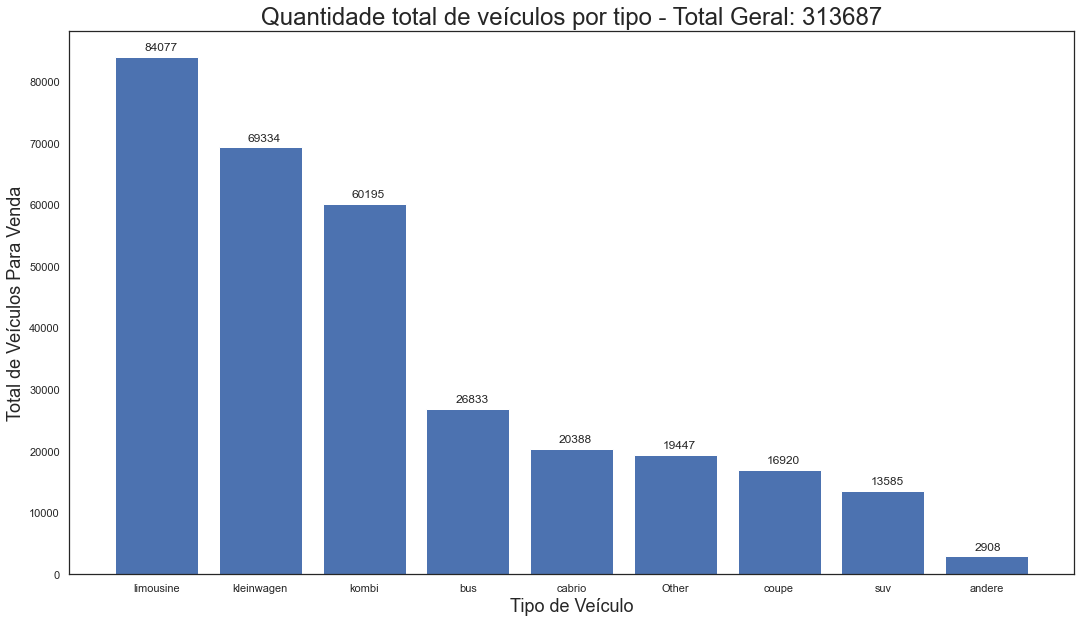

In [122]:
total_veiculos = df['vehicleType'].count()
qtd_tipo_veiculo = df.groupby('vehicleType')['vehicleType'].count().sort_values(ascending=False)
x = qtd_tipo_veiculo.index
y = qtd_tipo_veiculo.values
fig, ax = plt.subplots(figsize=(18,10))
ax.bar(x, y)
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':18})
ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':18})
ax.set_title('Quantidade total de veículos por tipo - Total Geral: ' + str(total_veiculos),fontdict= {'size':24})
for l in ax.patches:
    ax.annotate((l.get_height()), (l.get_x()+0.28, l.get_height()+1000))
plt.show()

## Outra farma de montar este gráfico. Um pouco mais elegante!

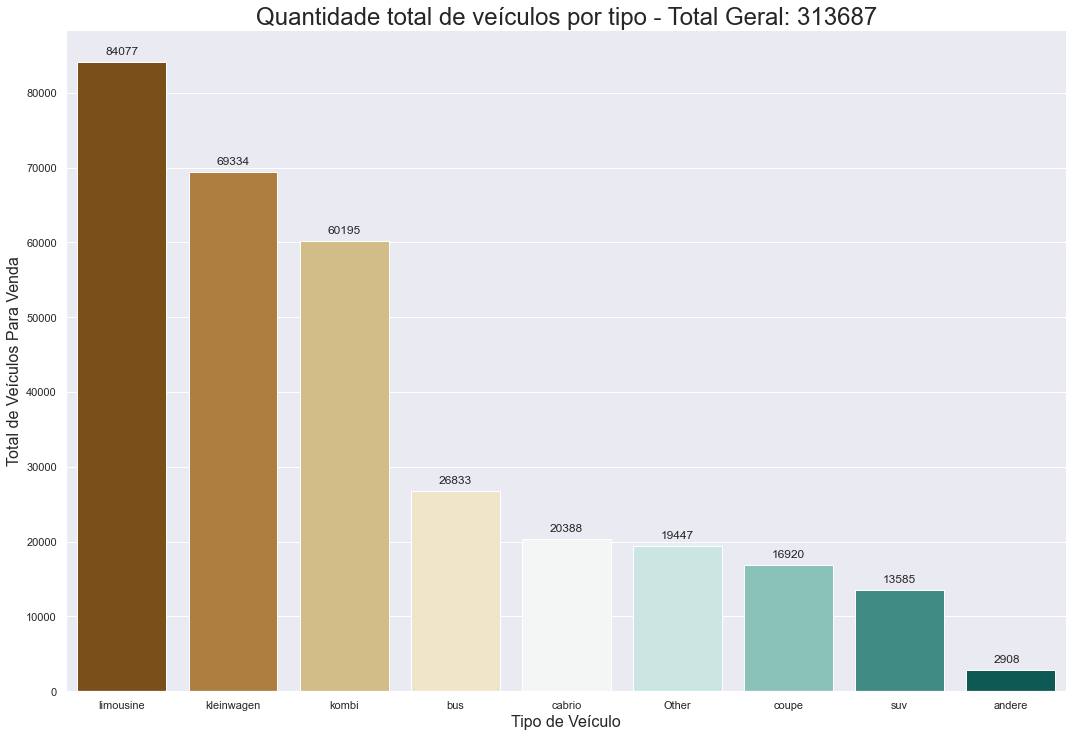

In [133]:
sea.set_style("darkgrid")
g = sea.catplot(x="vehicleType", data=df, kind="count", palette="BrBG", height=10, aspect=1.5, order = df['vehicleType'].value_counts().index)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title('Quantidade total de veículos por tipo - Total Geral: ' + str(total_veiculos), fontdict= {'size':24})
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.25, p.get_height()+1000))
plt.show()

# Agora vamos explorar as categorias dos carros
## Numero de veículos por catedoria

In [ ]:
#Vamos criar duas listas para fazer um label do Top5 com os valores
df_top5_brand_values = df.groupby('brand')['brand'].count().sort_values(ascending=False).head(5).tolist()
df_top5_brand_index = df.groupby('brand')['brand'].count().sort_values(ascending=False).head(5).index.tolist()

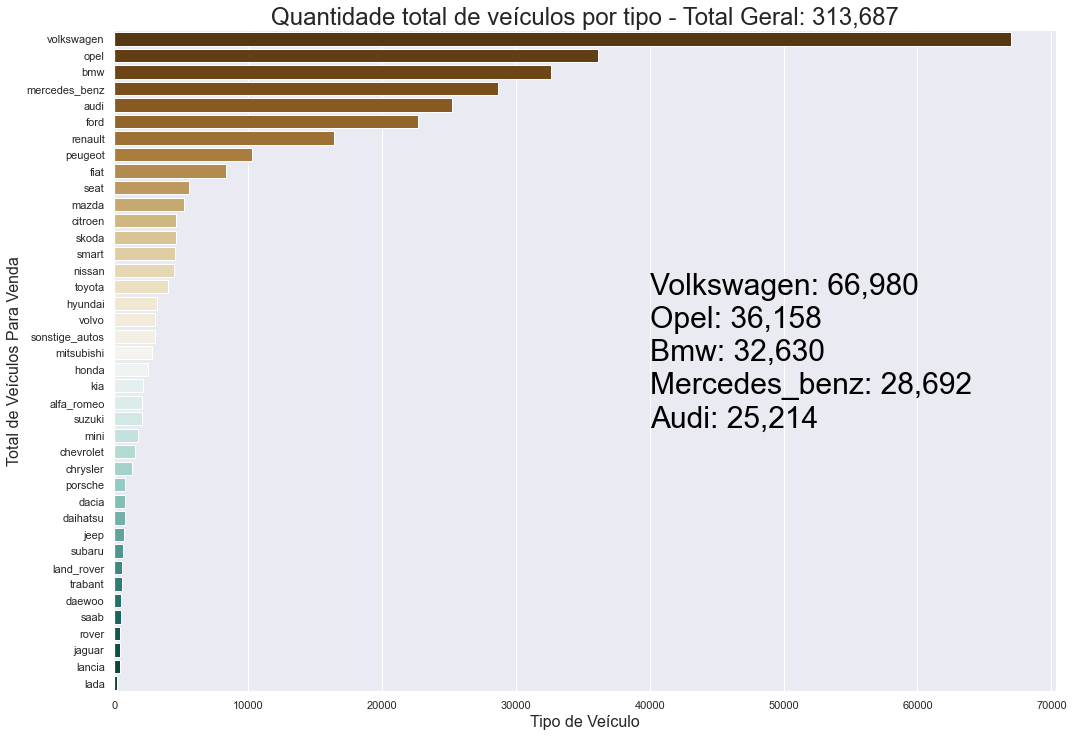

In [200]:
sea.set_style("darkgrid")
g = sea.catplot(y='brand', data=df, kind='count', palette="BrBG", height=10, aspect=1.5, \
                order = df['brand'].value_counts().index)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title('Quantidade total de veículos por tipo - Total Geral: ' + str(format(total_veiculos,',d')), fontdict= {'size':24})
g.ax.text(40000,15, df_top5_brand_index[0].capitalize() + ': ' + str(format(df_top5_brand[0],',d')), fontsize=30,color='black',ha='left', va='center')
g.ax.text(40000,17, df_top5_brand_index[1].capitalize() + ': ' + str(format(df_top5_brand[1],',d')), fontsize=30,color='black',ha='left', va='center')
g.ax.text(40000,19, df_top5_brand_index[2].capitalize() + ': ' + str(format(df_top5_brand[2],',d')), fontsize=30,color='black',ha='left', va='center')
g.ax.text(40000,21, df_top5_brand_index[3].capitalize() + ': ' + str(format(df_top5_brand[3],',d')), fontsize=30,color='black',ha='left', va='center')
g.ax.text(40000,23, df_top5_brand_index[4].capitalize() + ': ' + str(format(df_top5_brand[4],',d')), fontsize=30,color='black',ha='left', va='center')
plt.show()

## Preço médio dos veículos por tipo e caixa de câmbio

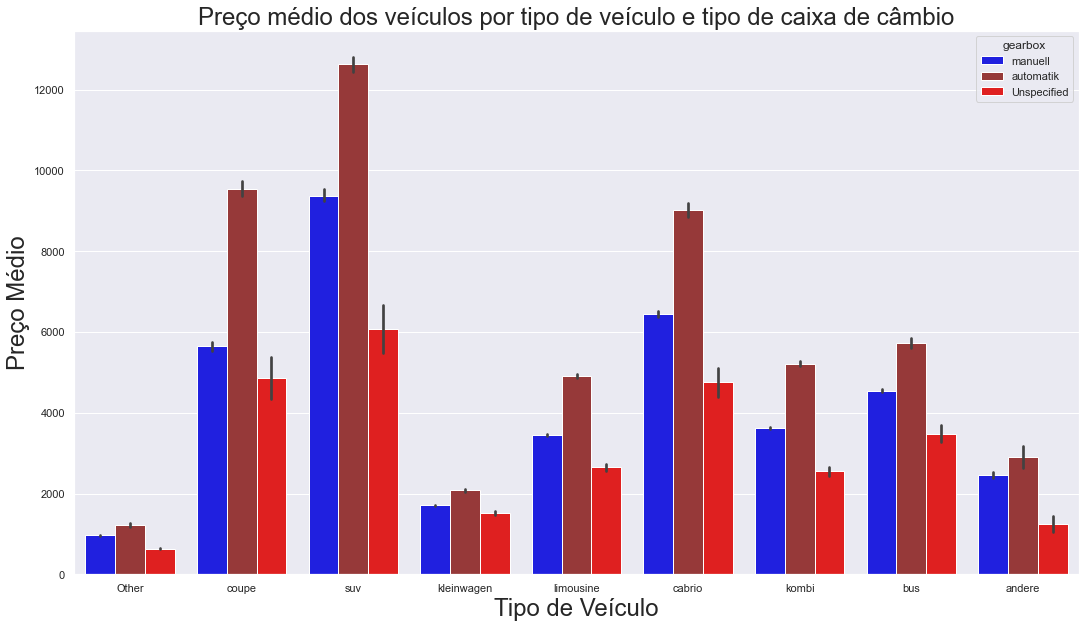

In [242]:
sea.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(18,10))
colors = ['blue', 'brown','red']
sea.barplot(x='vehicleType', y='price',hue='gearbox', palette=colors, data=df)
ax.set_title('Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio',fontdict= {'size':24})
ax.xaxis.set_label_text('Tipo de Veículo',fontdict= {'size':24})
ax.yaxis.set_label_text('Preço Médio',fontdict= {'size':24})
plt.show()

## Preço médio dos veículos por tipo de combustível

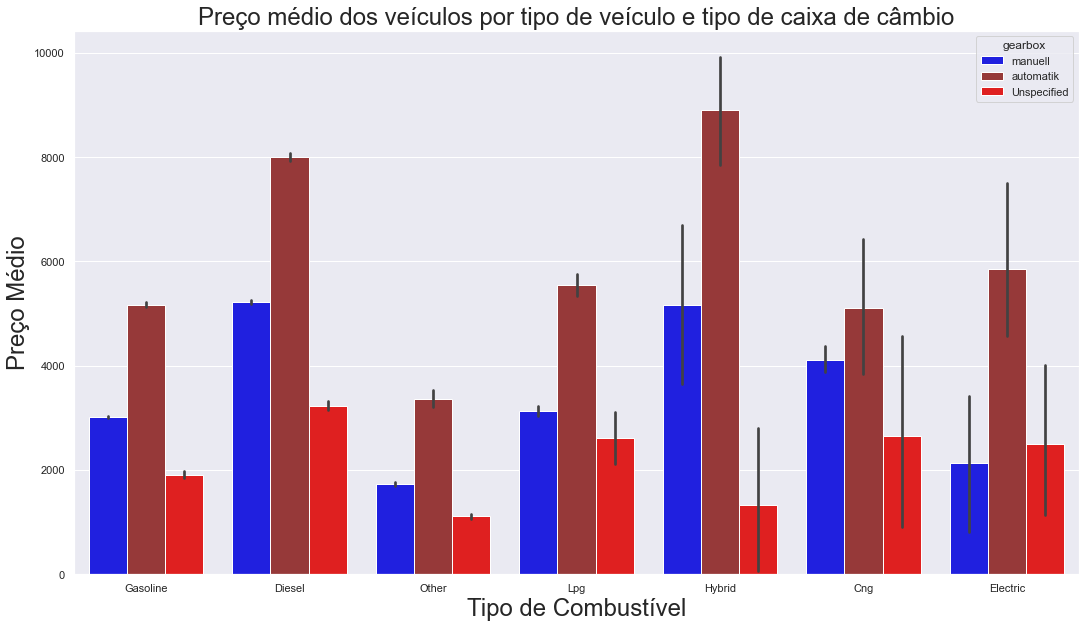

In [246]:
sea.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(18,10))
colors = ['blue', 'brown','red']
sea.barplot(x='fuelType', y='price',hue='gearbox', palette=colors, data=df)
ax.set_title('Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio',fontdict= {'size':24})
ax.xaxis.set_label_text('Tipo de Combustível',fontdict= {'size':24})
ax.yaxis.set_label_text('Preço Médio',fontdict= {'size':24})
plt.show()

## Potência média do veículo por tipo de veículo e caixa de câmbio

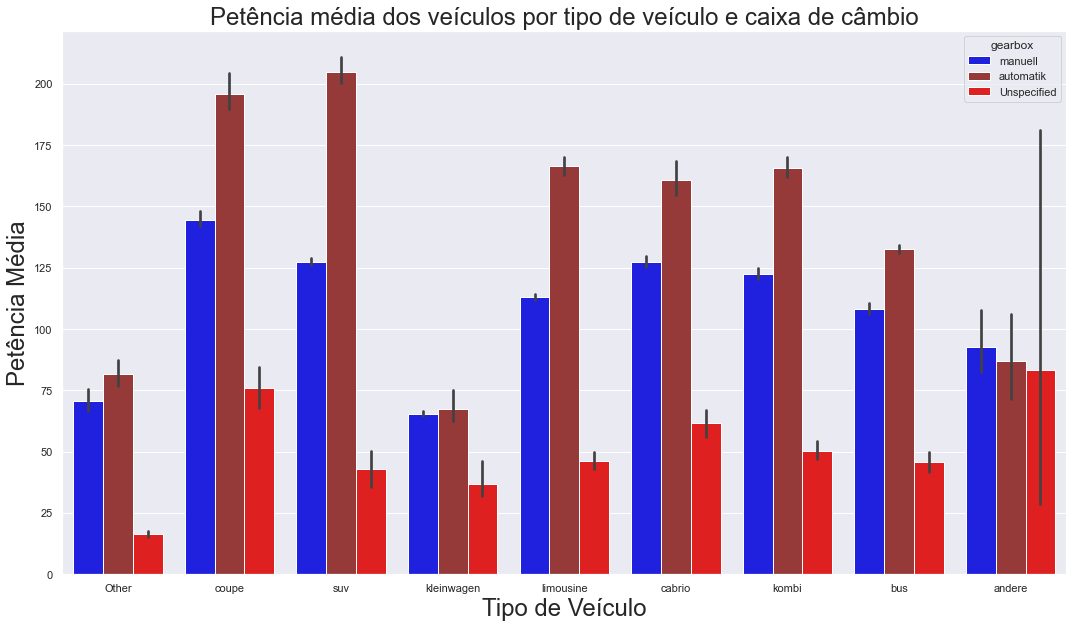

In [245]:
sea.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(18,10))
colors = ['blue', 'brown','red']
sea.barplot(x='vehicleType', y='powerPS',hue='gearbox', palette=colors, data=df)
ax.set_title('Petência média dos veículos por tipo de veículo e caixa de câmbio',fontdict= {'size':24})
ax.xaxis.set_label_text('Tipo de Veículo',fontdict= {'size':24})
ax.yaxis.set_label_text('Petência Média',fontdict= {'size':24})
plt.show()

## Agora vamos analisar a média de preço dos veículos conforme sua marca e modelo

In [380]:
# Aqui usaremos um laço de repetição para estruturar um DataFrame novo baseado nos valores unicos dos modelos 
# por tipo calculado a média de preços.
df_media = pd.DataFrame()
Cont = 0
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        df_media = df_media.append(pd.DataFrame({'brand':b , 'vehicleType':v, 'avgPrice':z}, index=[Cont]))
        Cont += 1

In [395]:
df_media["avgPrice"].fillna(0,inplace=True) #Preenche valores NaN com zero.
df_media["avgPrice"].isnull().value_counts() #Trata valores nulos
df_media["avgPrice"] = df_media["avgPrice"].astype(int) #Converte os valores para inteiros
df_media.head()

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Gráfico de mapa de calor bastante interessante para analisarmos a variação dos preços por marca e tipo

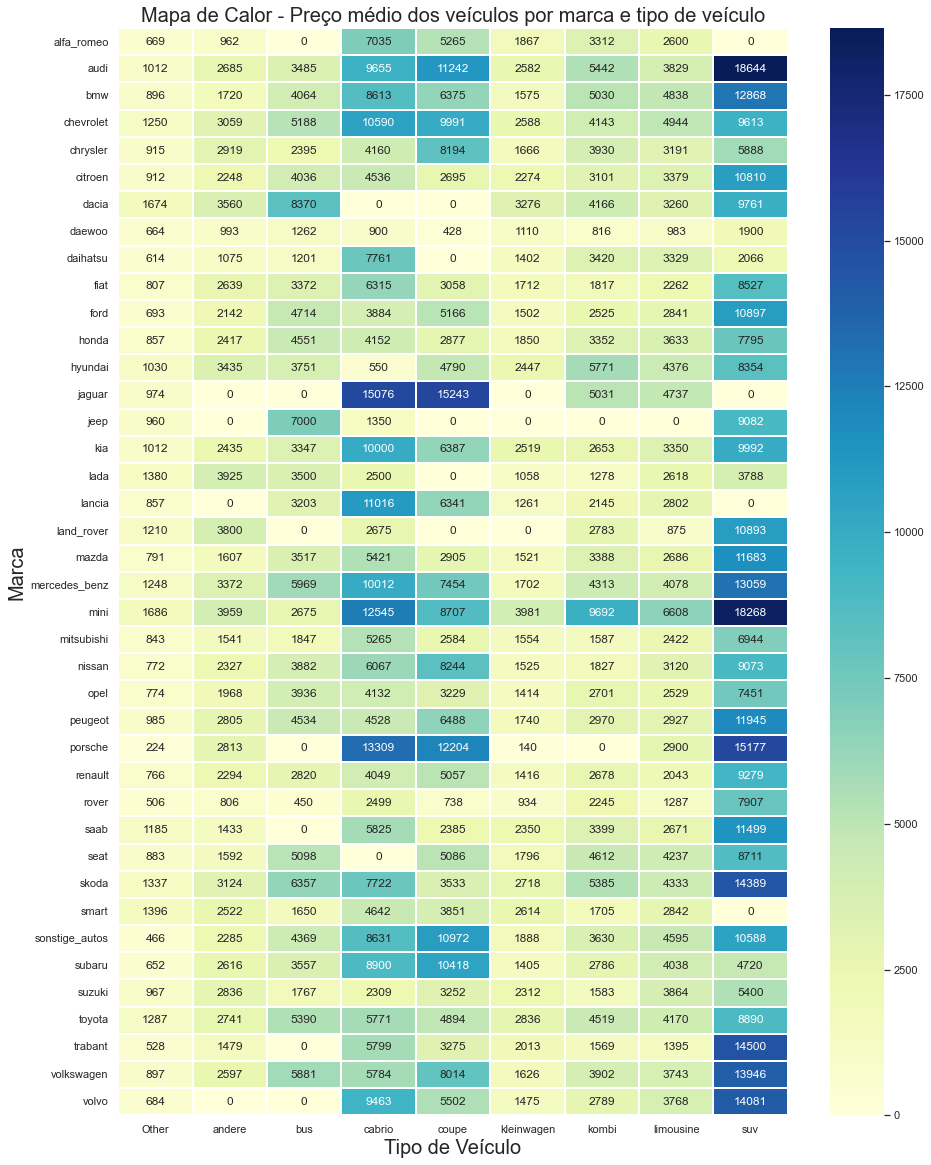

In [406]:
df_media_pivot = df_media.pivot('brand','vehicleType', 'avgPrice')
fig, ax = plt.subplots(figsize=(15,20))
sea.heatmap(df_media_pivot, linewidths=2, cmap="YlGnBu",annot=True, ax=ax, fmt='d')
ax.set_title('Mapa de Calor - Preço médio dos veículos por marca e tipo de veículo',fontdict={'size':20})
ax.xaxis.set_label_text('Tipo de Veículo',fontdict= {'size':20})
ax.yaxis.set_label_text('Marca',fontdict= {'size':20})
plt.show()